<a href="https://colab.research.google.com/github/idarwati/Health-Data-Analytics-Portfolio/blob/Day-5/H5_NLP_Patient_Feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1999328611.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Kategori_AI', data=df_text, order=df_text['Kategori_AI'].value_counts().index, palette='viridis')


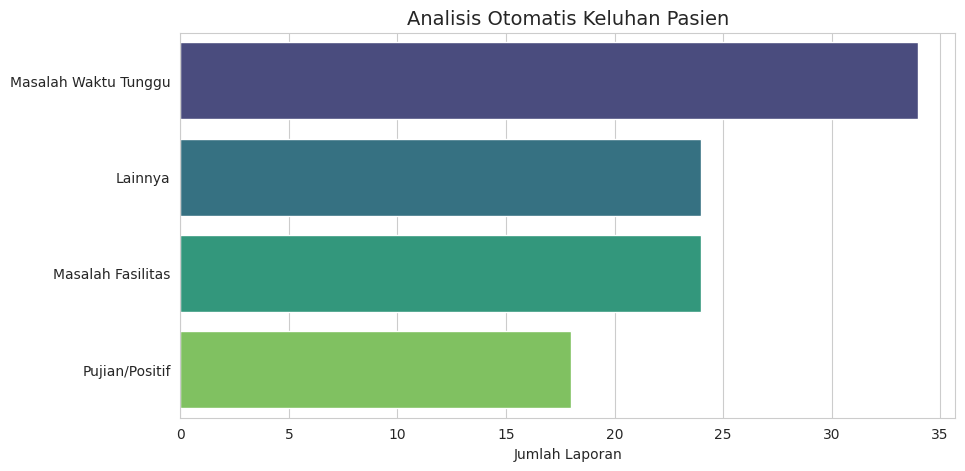

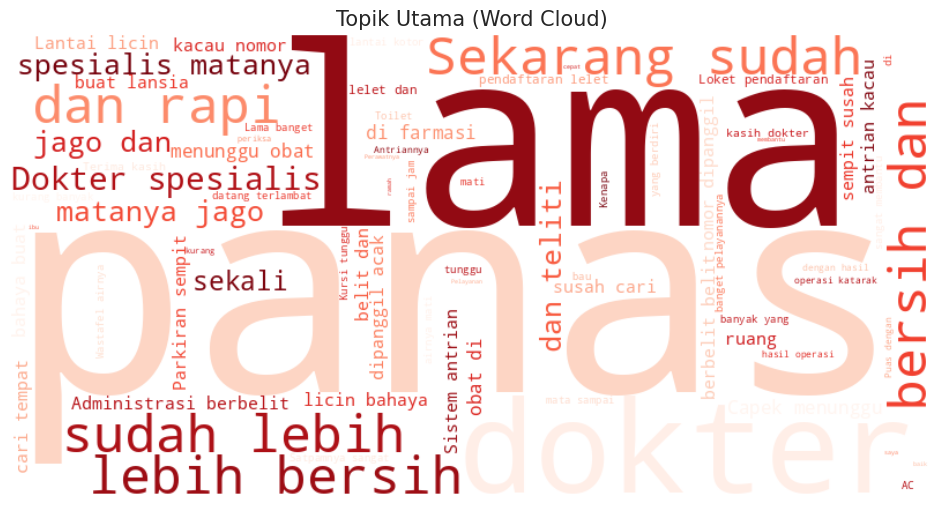

=== 5 Sampel Hasil Analisis AI ===


,Review_Pasien,Kategori_AI
0,Satpamnya sangat membantu,Lainnya
1,"AC di ruang tunggu mati, panas sekali",Masalah Fasilitas
2,Terima kasih dokter,Pujian/Positif
3,Toilet di lantai 2 kotor dan bau,Masalah Fasilitas
4,Wastafel airnya mati,Lainnya


In [1]:

# Install library untuk visualisasi teks
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Setup tampilan
sns.set_style("whitegrid")

# ==========================================
# 1. GENERATE DATA DUMMY (Review Pasien)
# ==========================================
# Kita buat 3 kategori keluhan umum di RS
komentar_antrean = [
    "Antriannya lama sekali di pendaftaran", "Menunggu dokter mata sampai 3 jam",
    "Loket pendaftaran lelet dan panas", "Sistem antrian kacau, nomor dipanggil acak",
    "Capek menunggu obat di farmasi", "Kenapa dokter datang terlambat?",
    "Lama banget pelayanannya", "Administrasi berbelit-belit dan lama"
]

komentar_fasilitas = [
    "Toilet di lantai 2 kotor dan bau", "AC di ruang tunggu mati, panas sekali",
    "Kursi tunggu kurang, banyak yang berdiri", "Parkiran sempit susah cari tempat",
    "Ruang periksa kurang bersih", "Wastafel airnya mati", "Lantai licin bahaya buat lansia"
]

komentar_positif = [
    "Pelayanan sangat ramah dan cepat", "Dokter spesialis matanya jago dan teliti",
    "Perawatnya baik membantu ibu saya", "Sekarang sudah lebih bersih dan rapi",
    "Puas dengan hasil operasi katarak", "Terima kasih dokter", "Satpamnya sangat membantu"
]

# Gabungkan jadi 100 data acak
np.random.seed(42)
all_reviews = (
    np.random.choice(komentar_antrean, 40).tolist() +  # 40% Komplain Antrean
    np.random.choice(komentar_fasilitas, 30).tolist() + # 30% Komplain Fasilitas
    np.random.choice(komentar_positif, 30).tolist()     # 30% Pujian
)
np.random.shuffle(all_reviews)

df_text = pd.DataFrame({'Review_Pasien': all_reviews})

# ==========================================
# 2. ANALISIS TEKS SEDERHANA (Keyword Extraction)
# ==========================================

# Fungsi sederhana untuk kategorisasi otomatis (Rule-Based)
def kategorisasi_komplain(teks):
    teks = teks.lower()
    if any(x in teks for x in ['lama', 'antri', 'menunggu', 'lambat']):
        return 'Masalah Waktu Tunggu'
    elif any(x in teks for x in ['kotor', 'bau', 'panas', 'kursi', 'parkir', 'ac']):
        return 'Masalah Fasilitas'
    elif any(x in teks for x in ['ramah', 'baik', 'puas', 'terima kasih', 'jago']):
        return 'Pujian/Positif'
    else:
        return 'Lainnya'

# Terapkan fungsi ke data
df_text['Kategori_AI'] = df_text['Review_Pasien'].apply(kategorisasi_komplain)

# ==========================================
# 3. VISUALISASI
# ==========================================

# A. Bar Chart: Apa masalah terbesar RS?
plt.figure(figsize=(10, 5))
sns.countplot(y='Kategori_AI', data=df_text, order=df_text['Kategori_AI'].value_counts().index, palette='viridis')
plt.title('Analisis Otomatis Keluhan Pasien', fontsize=14)
plt.xlabel('Jumlah Laporan')
plt.ylabel(None)
plt.show()

# B. Word Cloud (Apa kata yang paling sering muncul?)
# Gabungkan semua teks jadi satu string panjang
text_gabungan = " ".join(review for review in df_text.Review_Pasien)

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(text_gabungan)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # Hilangkan sumbu X/Y
plt.title('Topik Utama (Word Cloud)', fontsize=15)
plt.show()

# Cek hasil klasifikasi teks
print("=== 5 Sampel Hasil Analisis AI ===")
display(df_text.head())